In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 

import datagen as dg
import ml_perceptron as mlp
import utils

## 1-Classification of linearly non-separable data

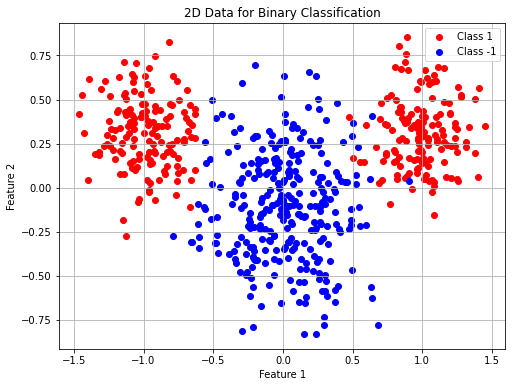

(300, 2)

In [2]:
ndata=300
classA, classB = dg.generate_data(ndata=ndata)
dg.visualize_data(classA, classB)
classA.shape

In [3]:
# shuffle the samples
middle = ndata//2
per = int(ndata*0.2)

i = middle-(per//2)
j = middle+(per//2)
data = np.vstack((classA[:i,:], classA[j:,:]))
X_train, y_train = dg.shuffle_data(data, classB[per:,:])
X_test, y_test = dg.shuffle_data(classA[i:j,:], classB[:per,:])

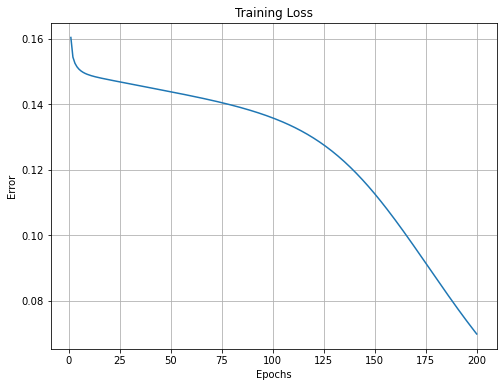

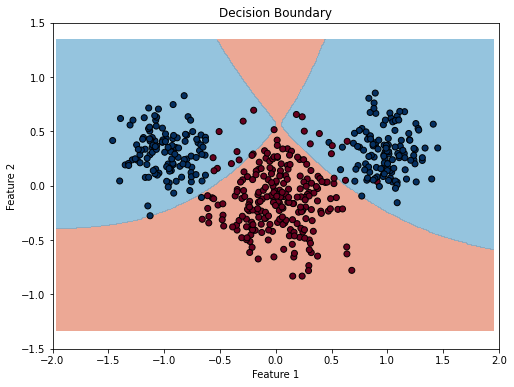

In [4]:
input_dim = 2
hidden_dim = 6
output_dim = 1

perceptron = mlp.MultiLayersPerceptron(input_dim, hidden_dim, output_dim, task=mlp.TASK1)
perceptron.train(X_train, y_train, epochs=200, lr = 0.0075, batch_size=50)

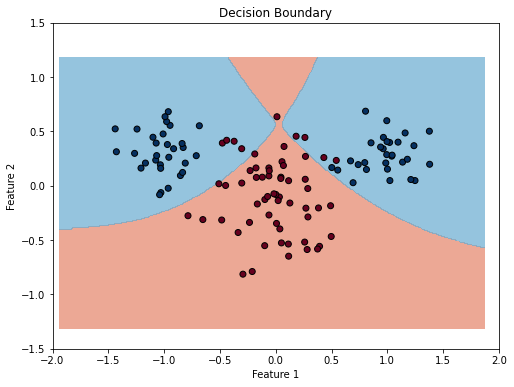

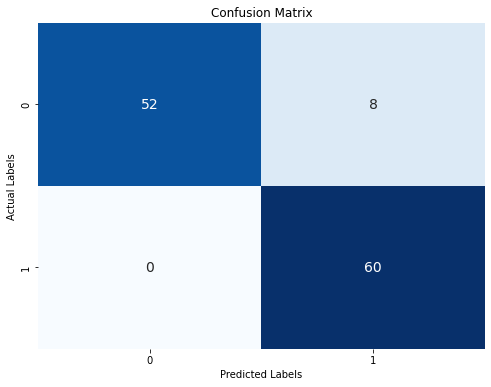

In [5]:
y_pred = perceptron.make_prediction(X_test)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot decision boundary

perceptron.plot_decision_boundary(X_test, y_test)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [6]:
# Calculate accuracy (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


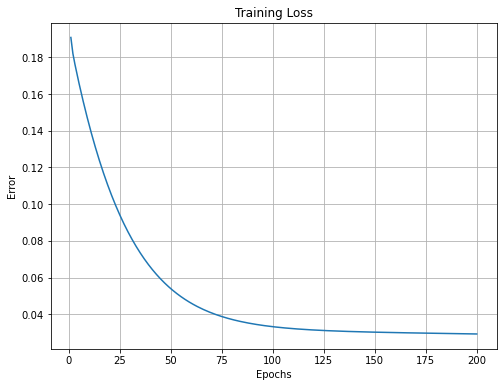

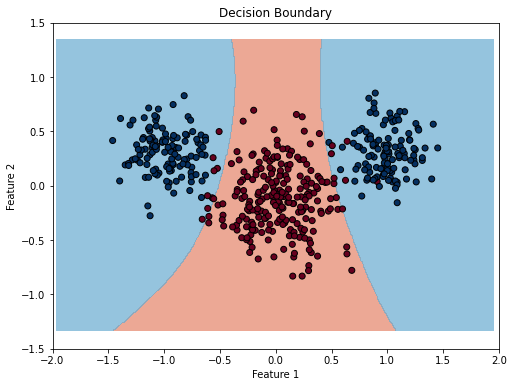

In [12]:
input_dim = 2
hidden_dim = 64
output_dim = 1

perceptron = mlp.MultiLayersPerceptron(input_dim, hidden_dim, output_dim, task=mlp.TASK1)
perceptron.train(X_train, y_train, epochs=200, lr = 0.0075, batch_size=50)

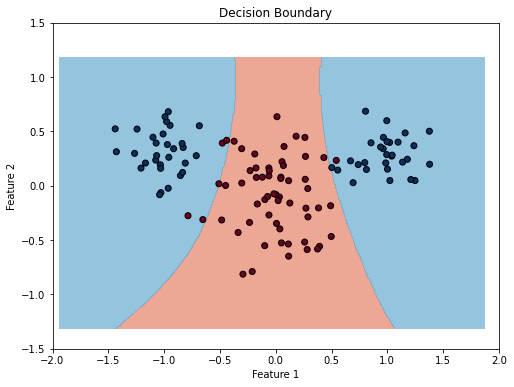

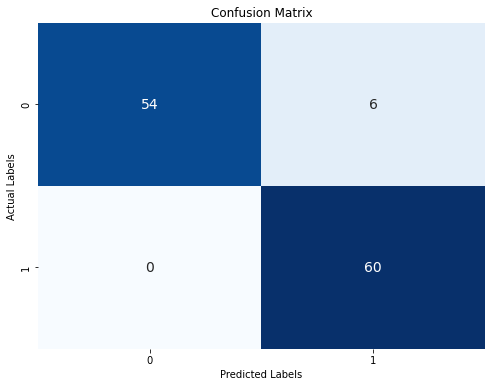

In [13]:
y_pred = perceptron.make_prediction(X_test)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot decision boundary

perceptron.plot_decision_boundary(X_test, y_test)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Calculate accuracy (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.95


## 2-The encoder problem

In [5]:
patterns = np.eye(8) * 2 - 1
targets = patterns

print("Patterns:\n", patterns)
print("Targets:\n", targets)

Patterns:
 [[ 1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]]
Targets:
 [[ 1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]]


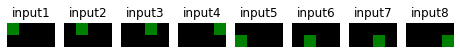

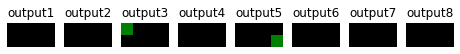

In [6]:
input_dim = 8
hidden_dim = 3
output_dim = 8

perceptron = mlp.MultiLayersPerceptron(input_dim, hidden_dim, output_dim, task=mlp.TASK2)
perceptron.autoencode(patterns, epochs=100, lr = 0.001)

## 3-Function approximation 

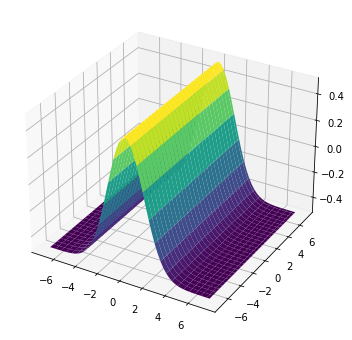

In [44]:
x, _ = dg.approximation_data(start=-7, end=7.5, step=0.25)
_, y = dg.approximation_data(start=-7, end=7.5, step=0.25)
X, Y = np.meshgrid(x, y)
# Calculating z values
Z = utils.approximation_func(X, Y)
dg.plot_approximation(X, Y, Z)

In [45]:
# Step 1: Flatten and Concatenate Features
X_flat = X.flatten()
Y_flat = Y.flatten()
input_features = np.column_stack((X_flat, Y_flat))

# Step 2: Flatten Target Variable (Z)
target_variable = Z.flatten()

# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(input_features, target_variable, test_size=0.2, random_state=42)


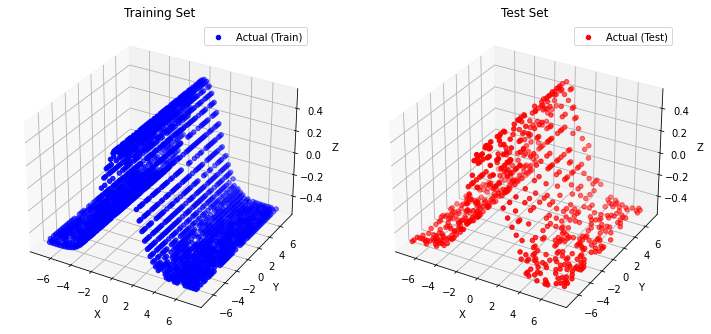

In [46]:
# Plot the Train Set
fig_train = plt.figure(figsize=(12, 6))
ax_train = fig_train.add_subplot(121, projection='3d')
ax_train.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', marker='o', label='Actual (Train)')
ax_train.set_xlabel('X')
ax_train.set_ylabel('Y')
ax_train.set_zlabel('Z')
ax_train.set_title('Training Set')
ax_train.legend()

# Plot the Test Set
ax_test = fig_train.add_subplot(122, projection='3d')
ax_test.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='o', label='Actual (Test)')
ax_test.set_xlabel('X')
ax_test.set_ylabel('Y')
ax_test.set_zlabel('Z')
ax_test.set_title('Test Set')
ax_test.legend()

plt.show()

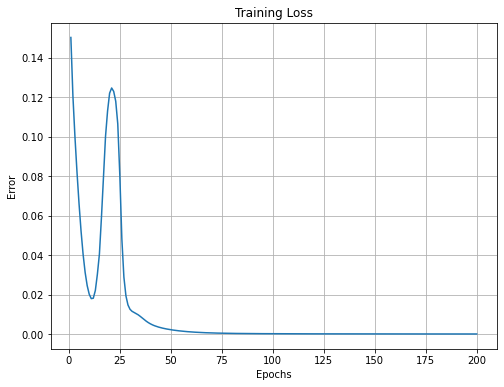

In [50]:
input_dim = 2
hidden_dim = 12
output_dim = 1

perceptron = mlp.MultiLayersPerceptron(input_dim, hidden_dim, output_dim, task=mlp.TASK3)
perceptron.train(X_train, y_train, epochs=200, lr = 0.0075, batch_size=50)

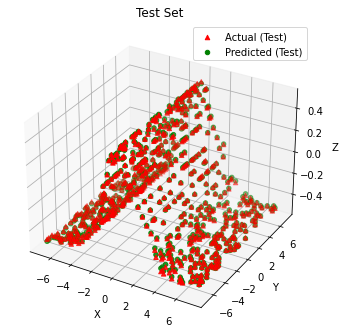

In [51]:
test_predictions = perceptron.make_prediction(X_test)

# Plot the Train Set
fig_train = plt.figure(figsize=(12, 6))
ax_test = fig_train.add_subplot(122, projection='3d')
ax_test.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='^', label='Actual (Test)')
ax_test.scatter(X_test[:, 0], X_test[:, 1], test_predictions, c='g', marker='o', label='Predicted (Test)')
ax_test.set_xlabel('X')
ax_test.set_ylabel('Y')
ax_test.set_zlabel('Z')
ax_test.set_title('Test Set')
ax_test.legend()

plt.show()

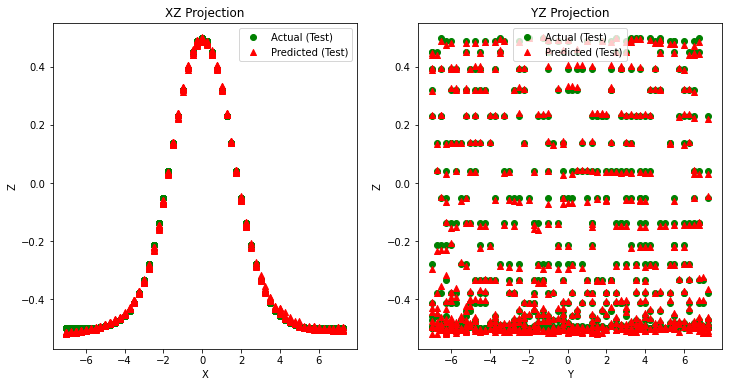

In [52]:
#Plot the projections
fig_projections = plt.figure(figsize=(12, 6))

# XY Projection (uninteresting)
# ax_xy = fig_projections.add_subplot(131)
# ax_xy.scatter(X_test[:, 0], X_test[:, 1], c='r', marker='^', label='Actual (Test)')
# ax_xy.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='o', label='Predicted (Test)')
# ax_xy.set_xlabel('X')
# ax_xy.set_ylabel('Y')
# ax_xy.set_title('XY Projection')
# ax_xy.legend()

# XZ Projection
ax_xz = fig_projections.add_subplot(121)
ax_xz.scatter(X_test[:, 0], y_test, c='g', marker='o', label='Actual (Test)')
ax_xz.scatter(X_test[:, 0], test_predictions, c='r', marker='^', label='Predicted (Test)')
ax_xz.set_xlabel('X')
ax_xz.set_ylabel('Z')
ax_xz.set_title('XZ Projection')
ax_xz.legend()

# YZ Projection
ax_yz = fig_projections.add_subplot(122)
ax_yz.scatter(X_test[:, 1], y_test, c='g', marker='o', label='Actual (Test)')
ax_yz.scatter(X_test[:, 1], test_predictions, c='r', marker='^', label='Predicted (Test)')
ax_yz.set_xlabel('Y')
ax_yz.set_ylabel('Z')
ax_yz.set_title('YZ Projection')
ax_yz.legend()

plt.show()

In [53]:
perceptron.loss_function(y_test, test_predictions)

7.38965302659937e-05

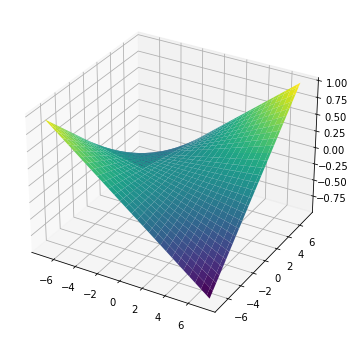

In [58]:
x, _ = dg.approximation_data(start=-7, end=7.5, step=0.25)
_, y = dg.approximation_data(start=-7, end=7.5, step=0.25)
X, Y = np.meshgrid(x, y)
# Calculating z values
Z = utils.approximation_func1(X, Y)
dg.plot_approximation(X, Y, Z)

In [59]:
# Step 1: Flatten and Concatenate Features
X_flat = X.flatten()
Y_flat = Y.flatten()
input_features = np.column_stack((X_flat, Y_flat))

# Step 2: Flatten Target Variable (Z)
target_variable = Z.flatten()

# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(input_features, target_variable, test_size=0.3, random_state=42)


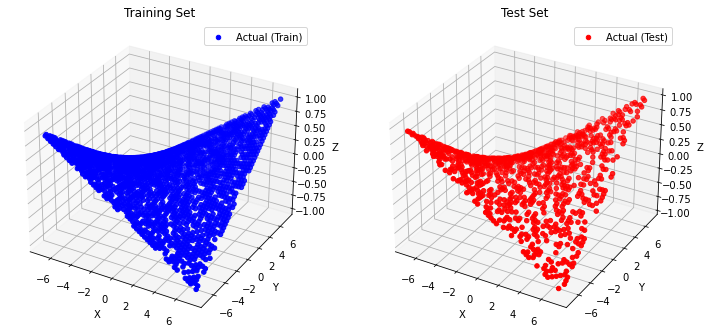

In [60]:
# Plot the Train Set
fig_train = plt.figure(figsize=(12, 6))
ax_train = fig_train.add_subplot(121, projection='3d')
ax_train.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', marker='o', label='Actual (Train)')
ax_train.set_xlabel('X')
ax_train.set_ylabel('Y')
ax_train.set_zlabel('Z')
ax_train.set_title('Training Set')
ax_train.legend()

# Plot the Test Set
ax_test = fig_train.add_subplot(122, projection='3d')
ax_test.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='o', label='Actual (Test)')
ax_test.set_xlabel('X')
ax_test.set_ylabel('Y')
ax_test.set_zlabel('Z')
ax_test.set_title('Test Set')
ax_test.legend()

plt.show()

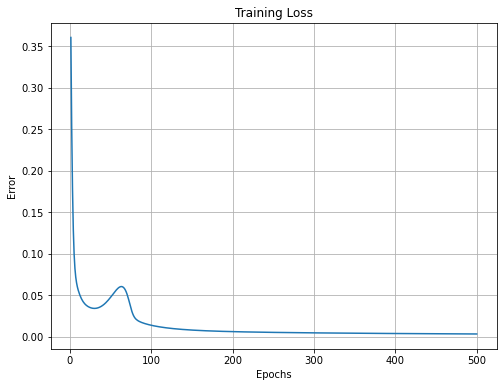

In [61]:
input_dim = 2
hidden_dim = 24
output_dim = 1

perceptron = mlp.MultiLayersPerceptron(input_dim, hidden_dim, output_dim, task=mlp.TASK3)
perceptron.train(X_train, y_train, epochs=500, lr = 0.001, batch_size=20)

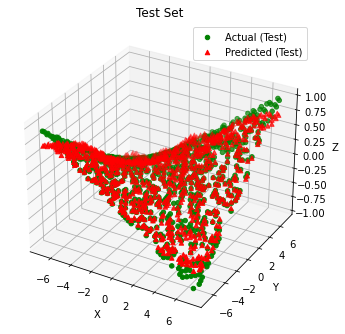

In [63]:
test_predictions = perceptron.make_prediction(X_test)

# Plot the Train Set
fig_train = plt.figure(figsize=(12, 6))
ax_test = fig_train.add_subplot(122, projection='3d')
ax_test.scatter(X_test[:, 0], X_test[:, 1], y_test, c='g', marker='o', label='Actual (Test)')
ax_test.scatter(X_test[:, 0], X_test[:, 1], test_predictions, c='r', marker='^', label='Predicted (Test)')
ax_test.set_xlabel('X')
ax_test.set_ylabel('Y')
ax_test.set_zlabel('Z')
ax_test.set_title('Test Set')
ax_test.legend()

plt.show()

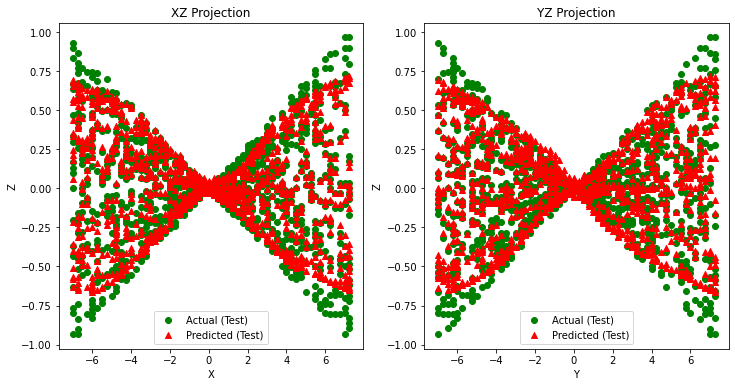

In [64]:
#Plot the projections
fig_projections = plt.figure(figsize=(12, 6))

# XY Projection (uninteresting)
# ax_xy = fig_projections.add_subplot(131)
# ax_xy.scatter(X_test[:, 0], X_test[:, 1], c='r', marker='^', label='Actual (Test)')
# ax_xy.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='o', label='Predicted (Test)')
# ax_xy.set_xlabel('X')
# ax_xy.set_ylabel('Y')
# ax_xy.set_title('XY Projection')
# ax_xy.legend()

# XZ Projection
ax_xz = fig_projections.add_subplot(121)
ax_xz.scatter(X_test[:, 0], y_test, c='g', marker='o', label='Actual (Test)')
ax_xz.scatter(X_test[:, 0], test_predictions, c='r', marker='^', label='Predicted (Test)')
ax_xz.set_xlabel('X')
ax_xz.set_ylabel('Z')
ax_xz.set_title('XZ Projection')
ax_xz.legend()

# YZ Projection
ax_yz = fig_projections.add_subplot(122)
ax_yz.scatter(X_test[:, 1], y_test, c='g', marker='o', label='Actual (Test)')
ax_yz.scatter(X_test[:, 1], test_predictions, c='r', marker='^', label='Predicted (Test)')
ax_yz.set_xlabel('Y')
ax_yz.set_ylabel('Z')
ax_yz.set_title('YZ Projection')
ax_yz.legend()

plt.show()

In [65]:
perceptron.loss_function(y_test, test_predictions)

3.7238433806767515e-03

##  4-Chaotic time-series prediction